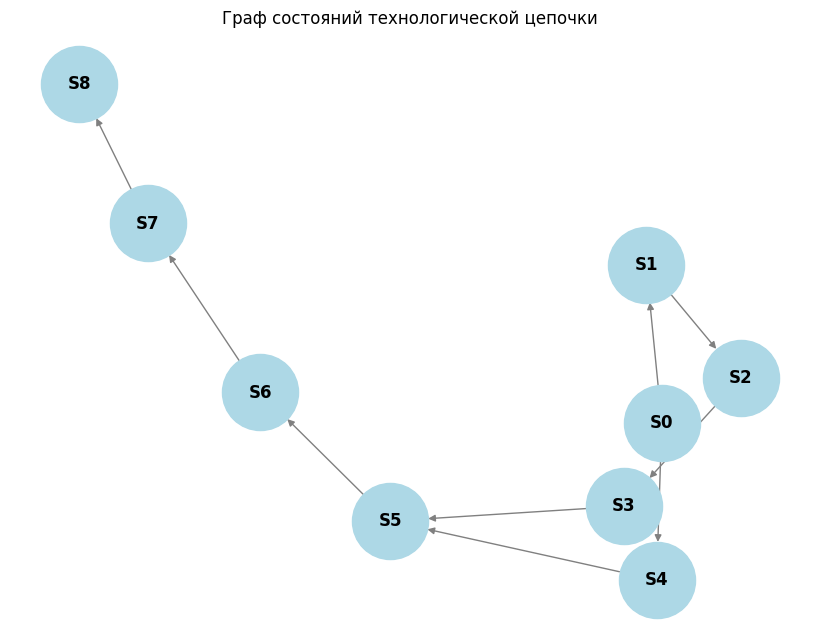

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Определяем состояния
states = ["S0", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"]

# Добавляем вершины
G.add_nodes_from(states)

# Добавляем связи (переходы между состояниями)
edges = [
    ("S0", "S1"), ("S1", "S2"), ("S2", "S3"), ("S3", "S5"),
    ("S0", "S4"), ("S4", "S5"), ("S5", "S6"), ("S6", "S7"), ("S7", "S8")
]

G.add_edges_from(edges)

# Отрисовка графа
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=12, font_weight="bold")
plt.title("Граф состояний технологической цепочки")
plt.show()

In [6]:
import simpy
import random

# Параметры системы
TIME_SIM = 1000  # Время моделирования (мин)
T_DELIVERY = 15   # Время доставки деталей (мин)
T_PRODUCTION = 3  # Время на сборку одной единицы продукции (мин)
T_SHIP = 10.2     # Интервал вывоза продукции (мин)
BATCH_SIZE = 20   # Размер партии деталей
PROD_BATCH = 5    # Сколько деталей требуется на один продукт

class Factory:
    def __init__(self, env):
        self.env = env
        self.parts = 15  # Начальное количество деталей
        self.products = 0
        self.finished_products = 0
        self.truck_busy = False
        self.env.process(self.production())
        self.env.process(self.shipping())

    def production(self):
        while True:
            if self.parts >= PROD_BATCH:
                self.parts -= PROD_BATCH
                yield self.env.timeout(T_PRODUCTION)
                self.products += 1
                print(f"{self.env.now:.1f} мин: Произведена 1 единица продукции")
            else:
                if not self.truck_busy:
                    self.env.process(self.deliver_parts())
                yield self.env.timeout(1)

    def deliver_parts(self):
        self.truck_busy = True
        print(f"{self.env.now:.1f} мин: Грузовик отправлен за деталями")
        yield self.env.timeout(T_DELIVERY)
        self.parts += BATCH_SIZE
        print(f"{self.env.now:.1f} мин: Доставлены {BATCH_SIZE} деталей")
        self.truck_busy = False

    def shipping(self):
        while True:
            yield self.env.timeout(T_SHIP)
            if self.products > 0:
                print(f"{self.env.now:.1f} мин: Отправлено {self.products} изделий на склад")
                self.finished_products += self.products
                self.products = 0

# Запуск симуляции
env = simpy.Environment()
factory = Factory(env)
env.run(until=TIME_SIM)

3.0 мин: Произведена 1 единица продукции
6.0 мин: Произведена 1 единица продукции
9.0 мин: Произведена 1 единица продукции
9.0 мин: Грузовик отправлен за деталями
10.2 мин: Отправлено 3 изделий на склад
24.0 мин: Доставлены 20 деталей
27.0 мин: Произведена 1 единица продукции
30.0 мин: Произведена 1 единица продукции
30.6 мин: Отправлено 2 изделий на склад
33.0 мин: Произведена 1 единица продукции
36.0 мин: Произведена 1 единица продукции
36.0 мин: Грузовик отправлен за деталями
40.8 мин: Отправлено 2 изделий на склад
51.0 мин: Доставлены 20 деталей
54.0 мин: Произведена 1 единица продукции
57.0 мин: Произведена 1 единица продукции
60.0 мин: Произведена 1 единица продукции
61.2 мин: Отправлено 3 изделий на склад
63.0 мин: Произведена 1 единица продукции
63.0 мин: Грузовик отправлен за деталями
71.4 мин: Отправлено 1 изделий на склад
78.0 мин: Доставлены 20 деталей
81.0 мин: Произведена 1 единица продукции
81.6 мин: Отправлено 1 изделий на склад
84.0 мин: Произведена 1 единица продукции